In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.6MB/s 
     |████████████████████████████████| 8.7MB 17.5MB/s 
     |████████████████████████████████| 2.1MB 46.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.19
    Uninstalling Cython-0.29.19:
      Successfully uninstalled Cython-0.29.19


In [0]:
import time
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import lightgbm as lgb
from itertools import cycle
from sklearn.svm import SVR
import statsmodels.api as sm
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

%matplotlib inline 
plt.style.use('bmh')
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [0]:
San_Juan_data = pd.read_csv("/content/drive/My Drive/Projects/DengAI/sanJuan_combined.csv")
Iquitos_data = pd.read_csv("/content/drive/My Drive/Projects/DengAI/iquitos_combined_pre_processed_data.csv")

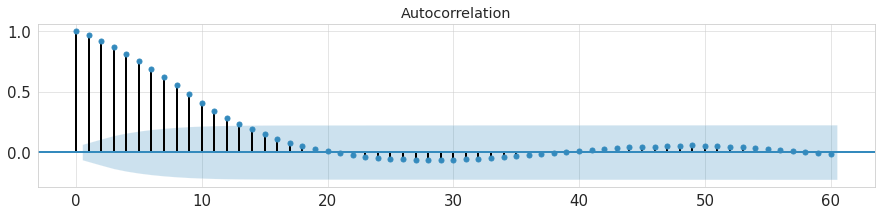

In [53]:
fig, ax = plt.subplots(figsize=(15, 3))
plot_acf(San_Juan_data['total_cases'].tolist(), lags=60, ax=ax);

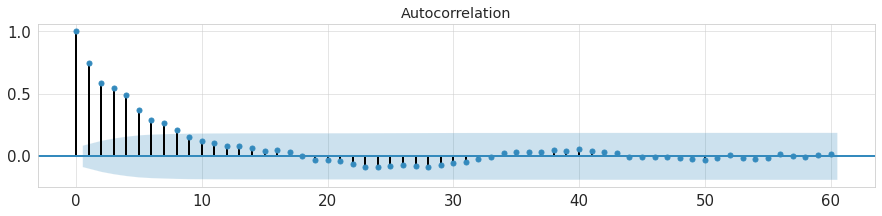

In [54]:
fig, ax = plt.subplots(figsize=(15, 3))
plot_acf(Iquitos_data['total_cases'].tolist(), lags=60, ax=ax);

Models on San Juan Model

In [55]:
San_Juan_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


ARIMA Model

In [56]:
arima_model_San_Juan = auto_arima(San_Juan_data['total_cases'],stationary=True,trace=True)
arima_model_San_Juan.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7490.925, BIC=7519.974, Time=0.925 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=10033.577, BIC=10043.260, Time=0.036 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7537.460, BIC=7551.985, Time=0.083 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9061.112, BIC=9075.637, Time=0.319 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=10374.835, BIC=10379.677, Time=0.021 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=7509.307, BIC=7533.515, Time=0.555 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7488.982, BIC=7513.191, Time=0.563 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7520.965, BIC=7540.332, Time=0.340 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7516.329, BIC=7535.696, Time=0.200 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=7490.924, BIC=7519.974, Time=1.305 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -3739.491
Date:                Wed, 03 Jun 2020   AIC                           7488.982
Time:                        20:39:47   BIC                           7513.191
Sample:                             0   HQIC                          7498.213
                                - 936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4932      0.158      3.129      0.002       0.184       0.802
ar.L1          1.8504      0.027     68.911      0.000       1.798       1.903
ar.L2         -0.8649      0.026    -33.623      0.000      -0.915      -0.814
ma.L1         -0.7831      0.034    -22.778      0.000      -0.851      -0.716
sigma2       172.3351      3.220     53.515      0.000     166.023     178.647
===================================================================================
Ljung-Box (Q):                       46.45   Jarque-Bera (JB):              5058.29
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
arima_model_San_Juan.fit(San_Juan_data['total_cases'])
predictions_San_Juan = arima_model_San_Juan.predict(n_periods=261)
predictions_San_Juan

array([ 7.09447092,  9.29592912, 11.55788114, 13.83923379, 16.10416267,
       18.32192188, 20.46660543, 22.51687049, 24.45563159, 26.26973414,
       27.94961492, 29.48895609, 30.88433873, 32.13490101, 33.24200527,
       34.20891776, 35.04050391, 35.74294145, 36.32345328, 36.79006109,
       37.15136076, 37.41631966, 37.59409594, 37.69387949, 37.7247539 ,
       37.69557859, 37.61489018, 37.49082183, 37.33103936, 37.14269285,
       36.93238221, 36.70613547, 36.46939826, 36.22703328, 35.98332824,
       35.74201112, 35.50627156, 35.27878714, 35.06175358, 34.85691786,
       34.66561347, 34.48879679, 34.32708416, 34.18078884, 34.04995736,
       33.93440491, 33.83374927, 33.74744305, 33.67480394, 33.6150429 ,
       33.56729003, 33.5306182 , 33.50406423, 33.48664779, 33.47738799,
       33.47531775, 33.47949597, 33.48901776, 33.50302267, 33.52070127,
       33.54129997, 33.56412452, 33.58854202, 33.61398191, 33.63993581,
       33.66595656, 33.69165639, 33.71670462, 33.74082472, 33.76

ARIMAX Model

In [58]:
combined = San_Juan_data.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

arima_model_San_Juan_arimax = auto_arima(San_Juan_data['total_cases'],trace=True,exogenous=combined,stationary=True)
arima_model_San_Juan_arimax.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7904.370, BIC=7967.311, Time=3.361 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=9995.205, BIC=10038.780, Time=0.369 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.211, BIC=7881.627, Time=1.496 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9119.135, BIC=9167.552, Time=2.521 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=9993.206, BIC=10031.939, Time=0.835 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.529, BIC=7886.787, Time=2.871 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.701, BIC=7889.959, Time=2.744 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.362, BIC=7894.461, Time=3.177 seconds
Total fit time: 17.383 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3906.606
Date:                Wed, 03 Jun 2020   AIC                           7833.211
Time:                        20:40:23   BIC                           7881.627
Sample:                             0   HQIC                          7851.672
                                - 936                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                               -2.2676     15.781     -0.144      0.886     -33.198      28.662
precipitation_amt_mm                    -0.0076      0.011     -0.692      0.489      -0.029       0.014
reanalysis_relative_humidity_percent   -17.3750      0.917    -18.944      0.000     -19.173     -15.577
reanalysis_dew_point_temp_k             84.1660      4.320     19.481      0.000      75.698      92.634
reanalysis_max_air_temp_k                2.5106      1.188      2.114      0.035       0.183       4.838
reanalysis_min_air_temp_k               -4.1057      1.128     -3.641      0.000      -6.316      -1.896
reanalysis_avg_temp_k                  -76.6258      3.960    -19.348      0.000     -84.388     -68.864
station_diur_temp_rng_c                 -0.1269      0.738     -0.172      0.864      -1.573       1.320
ar.L1                                    0.9428      0.005    199.355      0.000       0.933       0.952
sigma2                                 242.3142      6.166     39.296      0.000     230.228     254.400
===================================================================================
Ljung-Box (Q):                       60.28   Jarque-Bera (JB):              2189.60
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
arima_model_San_Juan_arimax.fit(San_Juan_data['total_cases'])
predictions_San_Juan_arimax = arima_model_San_Juan_arimax.predict(n_periods=261)
predictions_San_Juan_arimax

array([ 5.99071605,  6.94587386,  7.86674965,  8.75457386,  9.61053276,
       10.43577003, 11.23138834, 11.99845073, 12.73798214, 13.45097067,
       14.13836901, 14.80109561, 15.44003598, 16.05604385, 16.64994229,
       17.22252484, 17.77455657, 18.30677507, 18.81989147, 19.31459137,
       19.79153577, 20.25136193, 20.69468426, 21.1220951 , 21.53416553,
       21.93144616, 22.3144678 , 22.68374224, 23.03976287, 23.3830054 ,
       23.71392846, 24.0329742 , 24.34056892, 24.63712362, 24.92303453,
       25.19868368, 25.46443938, 25.72065672, 25.96767805, 26.20583341,
       26.43544103, 26.6568077 , 26.87022919, 27.07599068, 27.27436708,
       27.46562346, 27.65001537, 27.82778918, 27.99918243, 28.16442413,
       28.32373506, 28.47732809, 28.62540844, 28.76817396, 28.90581543,
       29.03851674, 29.1664552 , 29.28980177, 29.40872125, 29.52337253,
       29.63390881, 29.74047778, 29.84322184, 29.94227826, 30.0377794 ,
       30.12985286, 30.21862168, 30.30420445, 30.38671553, 30.46

SARIMA Model

In [60]:
sarima_model_San_Juan = auto_arima(San_Juan_data['total_cases'],seasonal=True,trace=True,stationary=True)
sarima_model_San_Juan.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7490.925, BIC=7519.974, Time=0.937 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=10033.577, BIC=10043.260, Time=0.038 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7537.460, BIC=7551.985, Time=0.083 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9061.112, BIC=9075.637, Time=0.287 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=10374.835, BIC=10379.677, Time=0.020 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=7509.307, BIC=7533.515, Time=0.574 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7488.982, BIC=7513.191, Time=0.580 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7520.965, BIC=7540.332, Time=0.348 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7516.329, BIC=7535.696, Time=0.204 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=7490.924, BIC=7519.974, Time=1.313 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -3739.491
Date:                Wed, 03 Jun 2020   AIC                           7488.982
Time:                        20:40:46   BIC                           7513.191
Sample:                             0   HQIC                          7498.213
                                - 936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4932      0.158      3.129      0.002       0.184       0.802
ar.L1          1.8504      0.027     68.911      0.000       1.798       1.903
ar.L2         -0.8649      0.026    -33.623      0.000      -0.915      -0.814
ma.L1         -0.7831      0.034    -22.778      0.000      -0.851      -0.716
sigma2       172.3351      3.220     53.515      0.000     166.023     178.647
===================================================================================
Ljung-Box (Q):                       46.45   Jarque-Bera (JB):              5058.29
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
sarima_model_San_Juan.fit(San_Juan_data['total_cases'])
predictions_San_Juan_ARIMA = sarima_model_San_Juan.predict(n_periods=261)
print(predictions_San_Juan_ARIMA)

[ 7.09447092  9.29592912 11.55788114 13.83923379 16.10416267 18.32192188
 20.46660543 22.51687049 24.45563159 26.26973414 27.94961492 29.48895609
 30.88433873 32.13490101 33.24200527 34.20891776 35.04050391 35.74294145
 36.32345328 36.79006109 37.15136076 37.41631966 37.59409594 37.69387949
 37.7247539  37.69557859 37.61489018 37.49082183 37.33103936 37.14269285
 36.93238221 36.70613547 36.46939826 36.22703328 35.98332824 35.74201112
 35.50627156 35.27878714 35.06175358 34.85691786 34.66561347 34.48879679
 34.32708416 34.18078884 34.04995736 33.93440491 33.83374927 33.74744305
 33.67480394 33.6150429  33.56729003 33.5306182  33.50406423 33.48664779
 33.47738799 33.47531775 33.47949597 33.48901776 33.50302267 33.52070127
 33.54129997 33.56412452 33.58854202 33.61398191 33.63993581 33.66595656
 33.69165639 33.71670462 33.74082472 33.763791   33.78542508 33.80559206
 33.82419659 33.84117897 33.85651118 33.87019296 33.88224816 33.89272104
 33.90167293 33.90917901 33.91532534 33.92020616 33

SARIMAX Model

In [62]:
#sarimax_model_sanjuan = auto_arima(sanJuan_data['total_cases'],seasonal=True,exogenous = sanJuan_data[['total_cases']].values)
combined = San_Juan_data.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

sarimax_model_San_Juan = auto_arima(San_Juan_data['total_cases'],exogenous= combined, seasonal=True,trace=True,stationary=True)
sarimax_model_San_Juan.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7904.370, BIC=7967.311, Time=3.552 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=9995.205, BIC=10038.780, Time=0.390 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.211, BIC=7881.627, Time=1.638 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9119.135, BIC=9167.552, Time=2.628 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=9993.206, BIC=10031.939, Time=0.876 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.529, BIC=7886.787, Time=2.964 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.701, BIC=7889.959, Time=2.798 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.362, BIC=7894.461, Time=3.195 seconds
Total fit time: 18.050 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3906.606
Date:                Wed, 03 Jun 2020   AIC                           7833.211
Time:                        20:41:19   BIC                           7881.627
Sample:                             0   HQIC                          7851.672
                                - 936                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                               -2.2676     15.781     -0.144      0.886     -33.198      28.662
precipitation_amt_mm                    -0.0076      0.011     -0.692      0.489      -0.029       0.014
reanalysis_relative_humidity_percent   -17.3750      0.917    -18.944      0.000     -19.173     -15.577
reanalysis_dew_point_temp_k             84.1660      4.320     19.481      0.000      75.698      92.634
reanalysis_max_air_temp_k                2.5106      1.188      2.114      0.035       0.183       4.838
reanalysis_min_air_temp_k               -4.1057      1.128     -3.641      0.000      -6.316      -1.896
reanalysis_avg_temp_k                  -76.6258      3.960    -19.348      0.000     -84.388     -68.864
station_diur_temp_rng_c                 -0.1269      0.738     -0.172      0.864      -1.573       1.320
ar.L1                                    0.9428      0.005    199.355      0.000       0.933       0.952
sigma2                                 242.3142      6.166     39.296      0.000     230.228     254.400
===================================================================================
Ljung-Box (Q):                       60.28   Jarque-Bera (JB):              2189.60
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
sarimax_model_San_Juan.fit(San_Juan_data['total_cases'])
predictions_San_Juan_ARIMAX = sarimax_model_San_Juan.predict(n_periods=261)
print(predictions_San_Juan_ARIMAX)

[ 5.99071605  6.94587386  7.86674965  8.75457386  9.61053276 10.43577003
 11.23138834 11.99845073 12.73798214 13.45097067 14.13836901 14.80109561
 15.44003598 16.05604385 16.64994229 17.22252484 17.77455657 18.30677507
 18.81989147 19.31459137 19.79153577 20.25136193 20.69468426 21.1220951
 21.53416553 21.93144616 22.3144678  22.68374224 23.03976287 23.3830054
 23.71392846 24.0329742  24.34056892 24.63712362 24.92303453 25.19868368
 25.46443938 25.72065672 25.96767805 26.20583341 26.43544103 26.6568077
 26.87022919 27.07599068 27.27436708 27.46562346 27.65001537 27.82778918
 27.99918243 28.16442413 28.32373506 28.47732809 28.62540844 28.76817396
 28.90581543 29.03851674 29.1664552  29.28980177 29.40872125 29.52337253
 29.63390881 29.74047778 29.84322184 29.94227826 30.0377794  30.12985286
 30.21862168 30.30420445 30.38671553 30.46626516 30.54295964 30.61690145
 30.68818937 30.75691867 30.82318117 30.88706542 30.94865676 31.0080375
 31.06528698 31.12048169 31.17369539 31.22499916 31.274

Models for Iquitos Data

ARIMA Model


In [65]:
arima_model_Iquitos = auto_arima(Iquitos_data['total_cases'],trace=True,stationary=True)
arima_model_Iquitos.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3515.663, BIC=3541.186, Time=0.474 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3950.093, BIC=3958.601, Time=0.025 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3528.197, BIC=3540.958, Time=0.100 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3674.835, BIC=3687.596, Time=0.166 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=4157.130, BIC=4161.384, Time=0.014 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3514.760, BIC=3536.029, Time=0.249 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3604.412, BIC=3621.427, Time=0.239 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3526.112, BIC=3543.127, Time=0.224 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3513.396, BIC=3538.919, Time=0.377 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3589.490, BIC=3610.759, Time=0.392 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1745.141
Date:                Wed, 03 Jun 2020   AIC                           3504.282
Time:                        20:42:37   BIC                           3534.058
Sample:                             0   HQIC                          3515.946
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9599      0.919      2.132      0.033       0.158       3.762
ar.L1          0.8352      0.144      5.817      0.000       0.554       1.117
ar.L2         -0.6226      0.197     -3.165      0.002      -1.008      -0.237
ar.L3          0.5243      0.095      5.505      0.000       0.338       0.711
ma.L1         -0.1475      0.156     -0.948      0.343      -0.453       0.158
ma.L2          0.4575      0.151      3.021      0.003       0.161       0.754
sigma2        48.0495      1.132     42.440      0.000      45.831      50.269
===================================================================================
Ljung-Box (Q):                       17.85   Jarque-Bera (JB):             13859.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
arima_model_Iquitos.fit(Iquitos_data['total_cases'])
predictions_Iquitos_arima = arima_model_Iquitos.predict(n_periods=155)
predictions_Iquitos_arima

array([4.3854249 , 4.00101993, 4.66862057, 5.6675831 , 5.88470327,
       5.79417387, 6.10719293, 6.53881924, 6.65695801, 6.65104012,
       6.79886839, 6.98795819, 7.05074484, 7.06297526, 7.1332487 ,
       7.21724591, 7.2500611 , 7.26202137, 7.2956239 , 7.33344788,
       7.35038889, 7.35860901, 7.37476003, 7.39201414, 7.40067936,
       7.40564322, 7.41344128, 7.42140717, 7.42580802, 7.42861307,
       7.4323928 , 7.43611073, 7.43833352, 7.43985715, 7.44169529,
       7.44344738, 7.44456522, 7.44537184, 7.44626826, 7.44710089,
       7.44766114, 7.44808071, 7.44851891, 7.44891744, 7.44919746,
       7.44941299, 7.44962763, 7.44981953, 7.44995919, 7.4500689 ,
       7.45017421, 7.45026708, 7.45033661, 7.45039208, 7.45044381,
       7.45048895, 7.45052352, 7.45055142, 7.45057686, 7.45059887,
       7.45061603, 7.45063001, 7.45064254, 7.4506533 , 7.45066182,
       7.4506688 , 7.45067497, 7.45068025, 7.45068447, 7.45068795,
       7.45069099, 7.45069358, 7.45069567, 7.4506974 , 7.45069

ARIMAX Model

In [67]:
combined = Iquitos_data.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

arimax_model_Iquitos = auto_arima(Iquitos_data['total_cases'],                     
                          seasonal=False,
                          exogenous = combined,trace=True,stationary=True)

arimax_model_Iquitos.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.821, BIC=3581.121, Time=2.150 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3947.150, BIC=3985.434, Time=0.281 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3538.838, BIC=3581.376, Time=0.849 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3679.763, BIC=3722.302, Time=1.462 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=3945.155, BIC=3979.186, Time=0.791 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.161, BIC=3576.207, Time=2.043 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3612.010, BIC=3658.802, Time=1.845 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3537.485, BIC=3584.277, Time=1.643 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3523.353, BIC=3578.652, Time=2.081 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3597.845, BIC=3648.891, Time=2.005 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -1745.249
Date:                Wed, 03 Jun 2020   AIC                           3518.497
Time:                        20:44:01   BIC                           3578.051
Sample:                             0   HQIC                          3541.827
                                - 520                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                                0.0368     41.868      0.001      0.999     -82.024      82.097
precipitation_amt_mm                    -0.0004      0.013     -0.035      0.972      -0.026       0.025
reanalysis_relative_humidity_percent    -0.0788      0.304     -0.259      0.796      -0.675       0.517
reanalysis_dew_point_temp_k             -0.0637      1.559     -0.041      0.967      -3.120       2.993
reanalysis_max_air_temp_k               -0.1870      0.297     -0.630      0.529      -0.769       0.395
reanalysis_min_air_temp_k                0.3158      0.364      0.868      0.385      -0.397       1.029
reanalysis_avg_temp_k                   -0.0075      1.216     -0.006      0.995      -2.390       2.375
station_diur_temp_rng_c                  0.0271      0.267      0.102      0.919      -0.497       0.551
ar.L1                                    0.7761      0.074     10.465      0.000       0.631       0.921
ma.L1                                   -0.0850      0.077     -1.101      0.271      -0.236       0.066
ma.L2                                   -0.1197      0.065     -1.837      0.066      -0.247       0.008
ma.L3                                    0.0964      0.044      2.211      0.027       0.011       0.182
ma.L4                                    0.1371      0.053      2.578      0.010       0.033       0.241
sigma2                                  47.8764      1.249     38.344      0.000      45.429      50.324
===================================================================================
Ljung-Box (Q):                       19.83   Jarque-Bera (JB):             14743.43
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             2.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
arimax_model_Iquitos.fit(Iquitos_data['total_cases'])
predictions_Iquitos_arimax = arimax_model_Iquitos.predict(n_periods=155)
predictions_Iquitos_arimax

array([4.65124341, 4.04790918, 4.630878  , 5.34514292, 5.82986618,
       6.20414853, 6.49315319, 6.7163101 , 6.88862223, 7.0216742 ,
       7.12441119, 7.20374025, 7.26499473, 7.31229279, 7.3488143 ,
       7.37701464, 7.39878972, 7.4156035 , 7.42858637, 7.43861119,
       7.44635191, 7.45232897, 7.45694419, 7.46050787, 7.46325959,
       7.46538434, 7.46702499, 7.46829182, 7.46927002, 7.47002534,
       7.47060856, 7.47105891, 7.47140664, 7.47167515, 7.47188247,
       7.47204256, 7.47216618, 7.47226163, 7.47233533, 7.47239224,
       7.47243618, 7.47247012, 7.47249632, 7.47251655, 7.47253217,
       7.47254423, 7.47255354, 7.47256073, 7.47256629, 7.47257058,
       7.47257389, 7.47257644, 7.47257842, 7.47257994, 7.47258112,
       7.47258203, 7.47258273, 7.47258327, 7.47258369, 7.47258401,
       7.47258426, 7.47258445, 7.4725846 , 7.47258472, 7.47258481,
       7.47258488, 7.47258493, 7.47258497, 7.472585  , 7.47258502,
       7.47258504, 7.47258506, 7.47258507, 7.47258508, 7.47258

SARIMA Model


In [70]:
sarima_model_Iquitos = auto_arima(Iquitos_data['total_cases'],seasonal=True,trace=True,stationary=True)
sarima_model_Iquitos.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3515.663, BIC=3541.186, Time=0.471 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3950.093, BIC=3958.601, Time=0.025 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3528.197, BIC=3540.958, Time=0.095 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3674.835, BIC=3687.596, Time=0.158 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=4157.130, BIC=4161.384, Time=0.014 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3514.760, BIC=3536.029, Time=0.243 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3604.412, BIC=3621.427, Time=0.240 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3526.112, BIC=3543.127, Time=0.216 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3513.396, BIC=3538.919, Time=0.369 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3589.490, BIC=3610.759, Time=0.388 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1745.141
Date:                Wed, 03 Jun 2020   AIC                           3504.282
Time:                        20:44:56   BIC                           3534.058
Sample:                             0   HQIC                          3515.946
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9599      0.919      2.132      0.033       0.158       3.762
ar.L1          0.8352      0.144      5.817      0.000       0.554       1.117
ar.L2         -0.6226      0.197     -3.165      0.002      -1.008      -0.237
ar.L3          0.5243      0.095      5.505      0.000       0.338       0.711
ma.L1         -0.1475      0.156     -0.948      0.343      -0.453       0.158
ma.L2          0.4575      0.151      3.021      0.003       0.161       0.754
sigma2        48.0495      1.132     42.440      0.000      45.831      50.269
===================================================================================
Ljung-Box (Q):                       17.85   Jarque-Bera (JB):             13859.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
sarima_model_Iquitos.fit(Iquitos_data['total_cases'])
predictions_Iquitos_ARIMA = sarima_model_Iquitos.predict(n_periods=155)
print(predictions_Iquitos_ARIMA)

[4.3854249  4.00101993 4.66862057 5.6675831  5.88470327 5.79417387
 6.10719293 6.53881924 6.65695801 6.65104012 6.79886839 6.98795819
 7.05074484 7.06297526 7.1332487  7.21724591 7.2500611  7.26202137
 7.2956239  7.33344788 7.35038889 7.35860901 7.37476003 7.39201414
 7.40067936 7.40564322 7.41344128 7.42140717 7.42580802 7.42861307
 7.4323928  7.43611073 7.43833352 7.43985715 7.44169529 7.44344738
 7.44456522 7.44537184 7.44626826 7.44710089 7.44766114 7.44808071
 7.44851891 7.44891744 7.44919746 7.44941299 7.44962763 7.44981953
 7.44995919 7.4500689  7.45017421 7.45026708 7.45033661 7.45039208
 7.45044381 7.45048895 7.45052352 7.45055142 7.45057686 7.45059887
 7.45061603 7.45063001 7.45064254 7.4506533  7.45066182 7.4506688
 7.45067497 7.45068025 7.45068447 7.45068795 7.45069099 7.45069358
 7.45069567 7.4506974  7.4506989  7.45070018 7.45070121 7.45070207
 7.45070281 7.45070344 7.45070395 7.45070438 7.45070475 7.45070505
 7.45070531 7.45070552 7.4507057  7.45070585 7.45070598 7.45070

SARIMAX 


In [72]:
combined = Iquitos_data.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

sarimax_model_iquitos = auto_arima(Iquitos_data['total_cases'],seasonal=True,exogenous = combined,trace=True,stationary=True)
sarimax_model_iquitos.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.821, BIC=3581.121, Time=2.173 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3947.150, BIC=3985.434, Time=0.277 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3538.838, BIC=3581.376, Time=0.852 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3679.763, BIC=3722.302, Time=1.484 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=3945.155, BIC=3979.186, Time=0.804 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.161, BIC=3576.207, Time=1.998 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3612.010, BIC=3658.802, Time=1.852 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3537.485, BIC=3584.277, Time=1.624 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3523.353, BIC=3578.652, Time=2.061 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3597.845, BIC=3648.891, Time=2.014 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -1745.249
Date:                Wed, 03 Jun 2020   AIC                           3518.497
Time:                        20:45:44   BIC                           3578.051
Sample:                             0   HQIC                          3541.827
                                - 520                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                                0.0368     41.868      0.001      0.999     -82.024      82.097
precipitation_amt_mm                    -0.0004      0.013     -0.035      0.972      -0.026       0.025
reanalysis_relative_humidity_percent    -0.0788      0.304     -0.259      0.796      -0.675       0.517
reanalysis_dew_point_temp_k             -0.0637      1.559     -0.041      0.967      -3.120       2.993
reanalysis_max_air_temp_k               -0.1870      0.297     -0.630      0.529      -0.769       0.395
reanalysis_min_air_temp_k                0.3158      0.364      0.868      0.385      -0.397       1.029
reanalysis_avg_temp_k                   -0.0075      1.216     -0.006      0.995      -2.390       2.375
station_diur_temp_rng_c                  0.0271      0.267      0.102      0.919      -0.497       0.551
ar.L1                                    0.7761      0.074     10.465      0.000       0.631       0.921
ma.L1                                   -0.0850      0.077     -1.101      0.271      -0.236       0.066
ma.L2                                   -0.1197      0.065     -1.837      0.066      -0.247       0.008
ma.L3                                    0.0964      0.044      2.211      0.027       0.011       0.182
ma.L4                                    0.1371      0.053      2.578      0.010       0.033       0.241
sigma2                                  47.8764      1.249     38.344      0.000      45.429      50.324
===================================================================================
Ljung-Box (Q):                       19.83   Jarque-Bera (JB):             14743.43
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             2.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
sarimax_model_iquitos.fit(Iquitos_data['total_cases'])
predictions_iquitos_ARIMAX = sarimax_model_iquitos.predict(n_periods=155)
print(predictions_iquitos_ARIMAX)

[4.65124341 4.04790918 4.630878   5.34514292 5.82986618 6.20414853
 6.49315319 6.7163101  6.88862223 7.0216742  7.12441119 7.20374025
 7.26499473 7.31229279 7.3488143  7.37701464 7.39878972 7.4156035
 7.42858637 7.43861119 7.44635191 7.45232897 7.45694419 7.46050787
 7.46325959 7.46538434 7.46702499 7.46829182 7.46927002 7.47002534
 7.47060856 7.47105891 7.47140664 7.47167515 7.47188247 7.47204256
 7.47216618 7.47226163 7.47233533 7.47239224 7.47243618 7.47247012
 7.47249632 7.47251655 7.47253217 7.47254423 7.47255354 7.47256073
 7.47256629 7.47257058 7.47257389 7.47257644 7.47257842 7.47257994
 7.47258112 7.47258203 7.47258273 7.47258327 7.47258369 7.47258401
 7.47258426 7.47258445 7.4725846  7.47258472 7.47258481 7.47258488
 7.47258493 7.47258497 7.472585   7.47258502 7.47258504 7.47258506
 7.47258507 7.47258508 7.47258508 7.47258509 7.47258509 7.4725851
 7.4725851  7.4725851  7.4725851  7.4725851  7.4725851  7.47258511
 7.47258511 7.47258511 7.47258511 7.47258511 7.47258511 7.472585